PROJETO PARA O MODELO COMPLETO - ANÁLISE DE PEGADINHAS
Sistema Original Completo (4ª ordem):
<TransferFunction>: sys[1094]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                  0.25 s + 0.1087
  ------------------------------------------------
  s^4 + 3.456 s^3 + 3.457 s^2 + 0.7193 s + 0.04157

Polos do sistema completo:
Polo 1: -1.6007+0.2524j | ωn = 1.6205 | ζ = 0.9878
Polo 2: -1.6007-0.2524j | ωn = 1.6205 | ζ = 0.9878
Polo 3: -0.1467+0.0000j | ωn = 0.1467 | ζ = 1.0000
Polo 4: -0.1079+0.0000j | ωn = 0.1079 | ζ = 1.0000
✓ Sistema original é estável

ANÁLISE DE VIABILIDADE DO PROJETO
Ganho DC do sistema: 2.6158

Margens de estabilidade do sistema original:
Margem de ganho: 25.93 (28.28 dB)
Margem de fase: 83.80°

Desempenho do sistema original:
Erro estático: -1.6158
Overshoot: 0.00%

PROJETO DO COMPENSADOR - MODELO COMPLETO
Especificações: ζ > 0.456, ωn > 0.877 rad/s

Compensador PID proposto:
<TransferFunction>: sys[1096]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  8 s^3 + 

C:\Users\rafat\AppData\Local\Temp\ipykernel_20388\581093258.py:108: FutureWarning: keyword 'kvect' is deprecated; use 'gains'
  root_locus(G_ma_comp, grid=False, kvect=np.logspace(-2, 2, 1000))
c:\Users\rafat\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\pzmap.py:381: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")
c:\Users\rafat\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


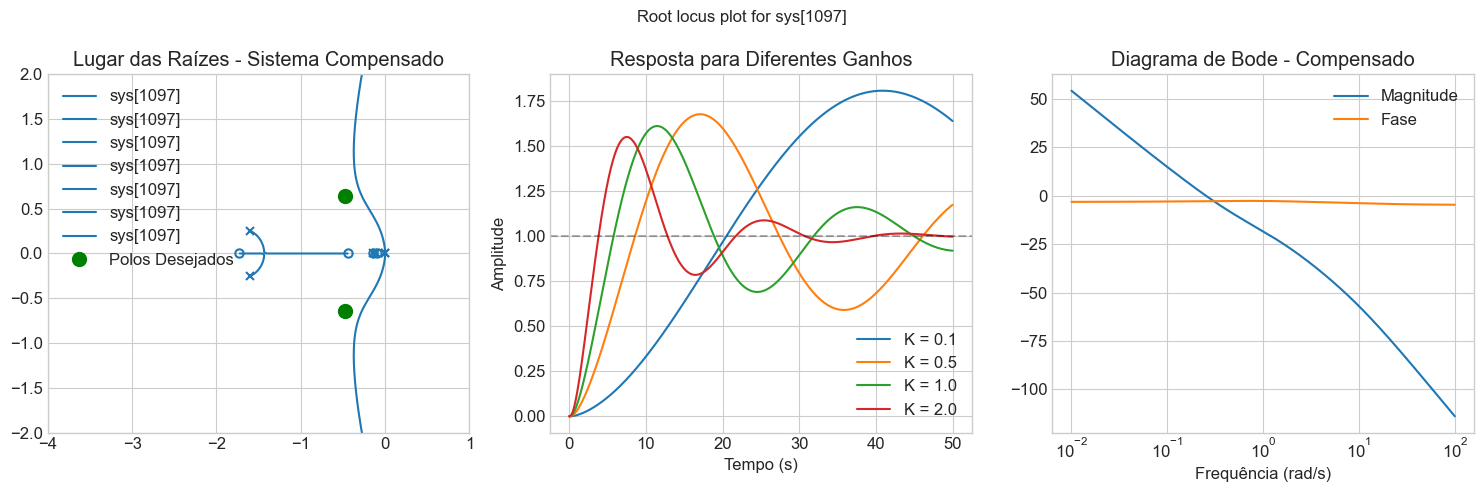

Ganho final escolhido: K = 0.8

RESULTADOS DO PROJETO - MODELO COMPLETO
Overshoot: 60.50% ✗
Tempo de acomodação (2%): 6.58 s ✓
Erro estático: -0.016424 ✗
COMPARAÇÃO: MODELO COMPLETO vs MODELO REDUZIDO
Intervalo de tempo aumentado para análise do regime permanente
Sistemas definidos:
Original: <TransferFunction>: sys[1125]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                  0.25 s + 0.1087
  ------------------------------------------------
  s^4 + 3.456 s^3 + 3.457 s^2 + 0.7193 s + 0.04157
Reduzido: <TransferFunction>: sys[1126]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

          0.3346
  ----------------------
  s^2 + 0.087 s + 0.1279
Ganho DC original: 2.615818
Ganho DC reduzido: 2.615818

Compensador criado:
C(s) = (0.50s² + 2.50s + 0.80)/s


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


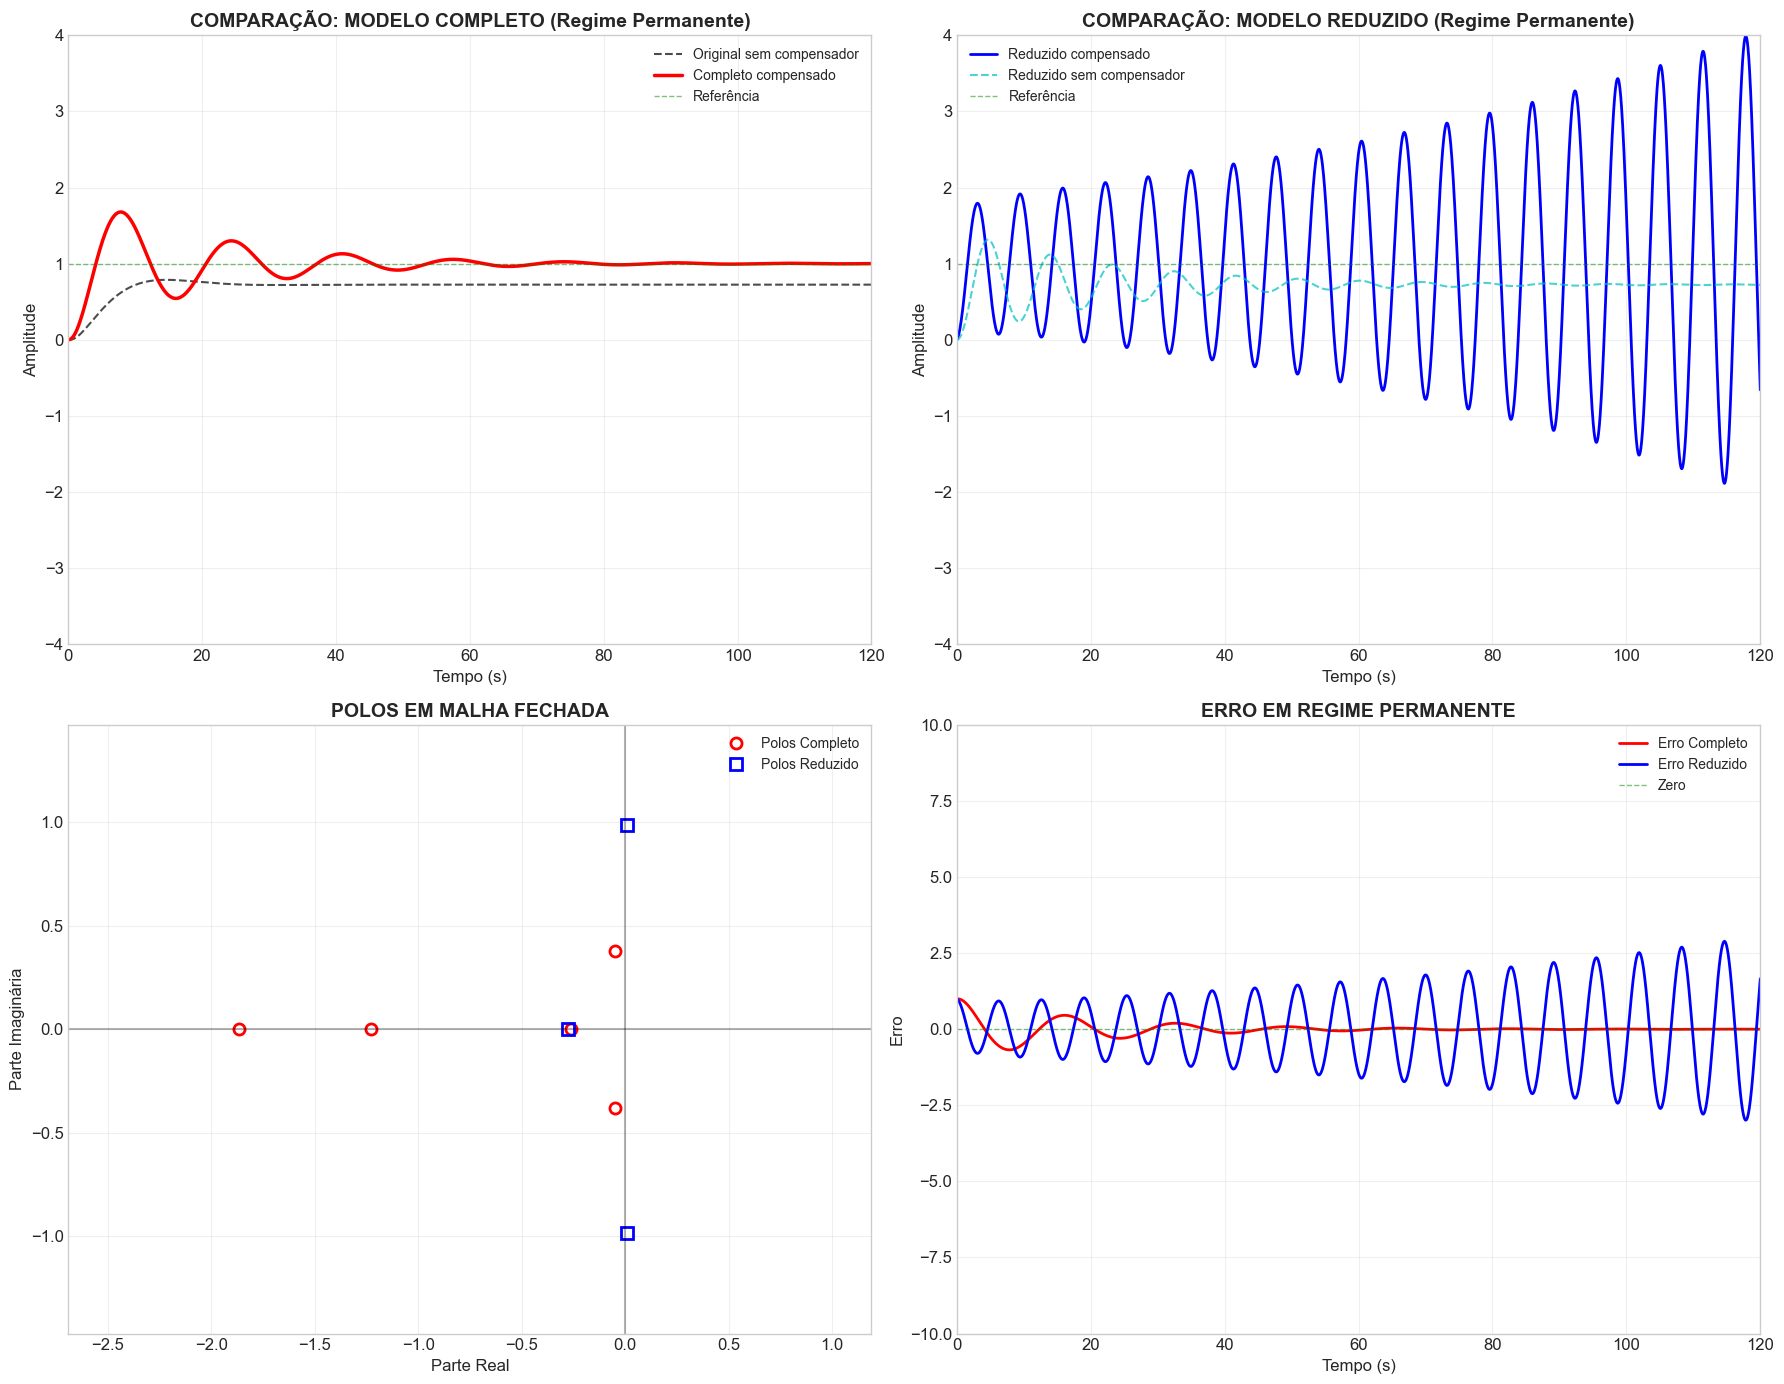


ANÁLISE DE DESEMPENHO - REGIME PERMANENTE

📊 MÉTRICAS DE DESEMPENHO - MODELO COMPLETO:
   • Tempo de subida (10-90%): 2.721 s
   • Overshoot: 67.85 %
   • Tempo de acomodação (2%): 4.081 s
   • Erro em regime permanente: 0.000014
   • Valor final (regime): 0.999986

📊 MÉTRICAS DE DESEMPENHO - MODELO REDUZIDO:
   • Tempo de subida (10-90%): 1.160 s
   • Overshoot: 643.52 %
   • Tempo de acomodação (2%): 1.640 s
   • Erro em regime permanente: -0.051520
   • Valor final (regime): 1.051520

ANÁLISE FINAL DO REGIME PERMANENTE
Valor final modelo completo (média últimos 100 pontos): 0.999959
Valor final modelo reduzido (média últimos 100 pontos): -1.983113
Erro regime completo: 0.00004053
Erro regime reduzido: 2.98311342

Comparação salva em: output\comparacao_completa_vs_reduzido_regime_permanente.png
Zoom no regime permanente salvo em: output\zoom_regime_permanente.png


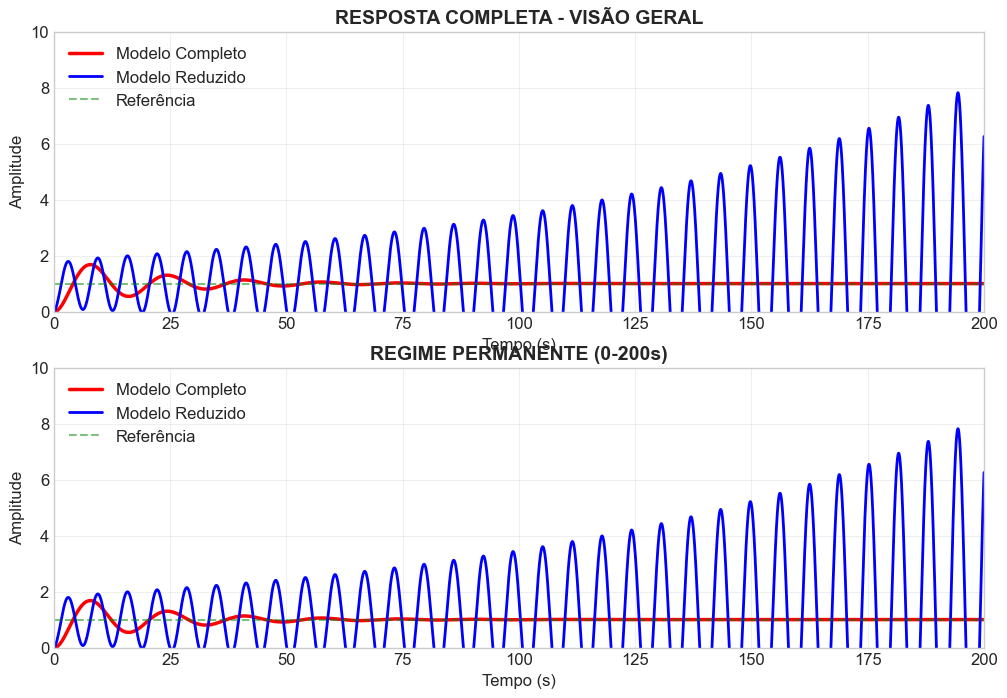

In [ ]:
# -*- coding: utf-8 -*-
"""
Projeto para o Modelo Completo - Análise Cuidadosa
Identificação de Possíveis Pegadinhas
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control
from control import step_response, margin, root_locus, poles
import sympy as sp
import os

print("="*70)
print("PROJETO PARA O MODELO COMPLETO - ANÁLISE DE PEGADINHAS")
print("="*70)

# Criar pasta output se não existir
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Sistema original de 4ª ordem
num_original = [0.25, 0.10875]
den_original = [1, 3.456, 3.45688, 0.719297, 0.041574]

G_original = control.tf(num_original, den_original)
print("Sistema Original Completo (4ª ordem):")
print(G_original)

# Análise dos polos do sistema completo
polos_originais = control.poles(G_original)
print("\nPolos do sistema completo:")
for i, polo in enumerate(polos_originais):
    freq_natural = abs(polo)
    amortecimento = -polo.real / abs(polo) if polo.real < 0 else 0
    print(f"Polo {i+1}: {polo:.4f} | ωn = {freq_natural:.4f} | ζ = {amortecimento:.4f}")

# PEGADINHA 1: Verificar se há polos instáveis ou no SPD
polos_instaveis = [p for p in polos_originais if p.real >= 0]
if polos_instaveis:
    print(f"⚠️  PEGADINHA ENCONTRADA: Sistema original tem polos instáveis: {polos_instaveis}")
else:
    print("✓ Sistema original é estável")

# Resposta ao degrau do sistema original com tempo aumentado
t_orig, y_orig = step_response(G_original, T=np.linspace(0, 150, 3000))  # Aumentado para 150s
print("\n" + "="*60)
print("ANÁLISE DE VIABILIDADE DO PROJETO")
print("="*60)

# Verificar ganho DC
K_dc_original = num_original[-1] / den_original[-1]
print(f"Ganho DC do sistema: {K_dc_original:.4f}")

# Verificar margens de estabilidade
gm, pm, wg, wp = margin(G_original)
print(f"\nMargens de estabilidade do sistema original:")
print(f"Margem de ganho: {gm:.2f} ({20*np.log10(gm):.2f} dB)")
print(f"Margem de fase: {pm:.2f}°")

# PEGADINHA 3: Sistema com baixa margem de fase inicial
if pm < 30:
    print("⚠️  PEGADINHA: Sistema tem margem de fase muito baixa inicialmente")
    print("   Projeto será mais desafiador!")

# Verificar se o sistema atende especificações naturalmente
y_ss_orig = y_orig[-1]
overshoot_orig = (np.max(y_orig) - y_ss_orig) / y_ss_orig * 100
erro_estatico_orig = 1 - y_ss_orig

print(f"\nDesempenho do sistema original:")
print(f"Erro estático: {erro_estatico_orig:.4f}")
print(f"Overshoot: {overshoot_orig:.2f}%")
print("\n" + "="*60)
print("PROJETO DO COMPENSADOR - MODELO COMPLETO")
print("="*60)

# Especificações (mesmas do item d)
Mp_max = 20    # Overshoot < 20%
Ts_max = 10     # Tempo acomodação < 10s
zeta_min = 0.456
omega_n_min = 4 / (Ts_max * zeta_min)

print(f"Especificações: ζ > {zeta_min:.3f}, ωn > {omega_n_min:.3f} rad/s")

# Estratégia: Usar controlador PID com filtro
Kp = 1.5
Ki = 0.2
Kd = 0.8
omega_filtro = 10

# Criar compensador PID com filtro
num_pid = [Kd*omega_filtro, Kp*omega_filtro + Kd, Kp + Ki*omega_filtro, Ki]
den_pid = [1, omega_filtro, 0, 0]

C_pid = control.tf(num_pid, den_pid)
print("\nCompensador PID proposto:")
print(C_pid)

# Sistema em malha aberta compensado
G_ma_comp = G_original * C_pid

# Lugar das raízes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
root_locus(G_ma_comp, grid=False, kvect=np.logspace(-2, 2, 1000))
plt.title('Lugar das Raízes - Sistema Compensado')
plt.xlim([-4, 1])
plt.ylim([-2, 2])

# Polos desejados
zeta_desejado = 0.6
omega_n_desejado = 0.8
polo_desejado_1 = -zeta_desejado * omega_n_desejado + 1j * omega_n_desejado * np.sqrt(1 - zeta_desejado**2)
polo_desejado_2 = -zeta_desejado * omega_n_desejado - 1j * omega_n_desejado * np.sqrt(1 - zeta_desejado**2)

plt.plot(polo_desejado_1.real, polo_desejado_1.imag, 'go', markersize=10, label='Polos Desejados')
plt.plot(polo_desejado_2.real, polo_desejado_2.imag, 'go', markersize=10)
plt.legend()

# Resposta ao degrau para diferentes ganhos
plt.subplot(1, 3, 2)
ganhos_testar = [0.1, 0.5, 1.0, 2.0]

for K in ganhos_testar:
    G_mf_temp = control.feedback(K * G_ma_comp, 1)
    t_temp, y_temp = step_response(G_mf_temp, T=np.linspace(0, 50, 1000))  # Tempo aumentado
    plt.plot(t_temp, y_temp, label=f'K = {K}')

plt.axhline(1, color='k', linestyle='--', alpha=0.3)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Resposta para Diferentes Ganhos')
plt.legend()
plt.grid(True)

# Diagrama de Bode
plt.subplot(1, 3, 3)
mag, phase, omega = control.bode(G_ma_comp, plot=False)
plt.semilogx(omega, 20*np.log10(mag), label='Magnitude')
plt.semilogx(omega, phase, label='Fase')
plt.title('Diagrama de Bode - Compensado')
plt.xlabel('Frequência (rad/s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Ajuste do compensador
K_final_completo = 0.8
C_final_completo = K_final_completo * C_pid
print(f"Ganho final escolhido: K = {K_final_completo}")

# Sistema em malha fechada
G_mf_completo = control.feedback(C_final_completo * G_original, 1)

# Resposta ao degrau com tempo aumentado para regime permanente
t_mf_comp, y_mf_comp = step_response(G_mf_completo, T=np.linspace(0, 100, 4000))  # Aumentado para 100s

# Análise de desempenho
y_ss_comp = y_mf_comp[-1]
y_max_comp = np.max(y_mf_comp)
overshoot_comp = ((y_max_comp - y_ss_comp) / y_ss_comp) * 100 if y_ss_comp != 0 else 0

# Tempo de acomodação (2%)
ts_index_comp = np.where(np.abs(y_mf_comp - y_ss_comp) <= 0.02 * y_ss_comp)[0]
ts_comp = t_mf_comp[ts_index_comp[0]] if len(ts_index_comp) > 0 else float('inf')

# Erro estático
erro_estatico_comp = 1 - y_ss_comp

print("\n" + "="*60)
print("RESULTADOS DO PROJETO - MODELO COMPLETO")
print("="*60)
print(f"Overshoot: {overshoot_comp:.2f}% {'✓' if overshoot_comp < Mp_max else '✗'}")
print(f"Tempo de acomodação (2%): {ts_comp:.2f} s {'✓' if ts_comp < Ts_max else '✗'}")
print(f"Erro estático: {erro_estatico_comp:.6f} {'✓' if abs(erro_estatico_comp) < 0.01 else '✗'}")

# =============================================================================
# COMPARAÇÃO ENTRE MODELO COMPLETO E REDUZIDO
# =============================================================================

def definir_sistemas():
    """Define os sistemas original e reduzido"""
    # Sistema original (4ª ordem)
    num_original = [0.25, 0.10875]
    den_original = [1, 3.456, 3.45688, 0.719297, 0.041574]
    G_original = control.TransferFunction(num_original, den_original)
    
    # Sistema reduzido (2ª ordem) - baseado nos polos dominantes
    sigma = 0.0435
    omega = 0.355
    den_reduzido = [1, 2*sigma, sigma**2 + omega**2]
    
    # Ajustar ganho DC
    ganho_dc_original = 0.10875 / 0.041574
    ganho_dc_reduzido = den_reduzido[2]
    num_reduzido = [ganho_dc_original * ganho_dc_reduzido]
    
    G_reduzido = control.TransferFunction(num_reduzido, den_reduzido)
    
    print("Sistemas definidos:")
    print(f"Original: {G_original}")
    print(f"Reduzido: {G_reduzido}")
    print(f"Ganho DC original: {control.dcgain(G_original):.6f}")
    print(f"Ganho DC reduzido: {control.dcgain(G_reduzido):.6f}")
    
    return G_original, G_reduzido

def criar_compensador():
    """Cria um compensador PID"""
    Kp = 2.5
    Ki = 0.8
    Kd = 0.5
    
    num_comp = [Kd, Kp, Ki]
    den_comp = [1, 0]
    
    C_compensador = control.TransferFunction(num_comp, den_comp)
    
    print(f"\nCompensador criado:")
    print(f"C(s) = ({Kd:.2f}s² + {Kp:.2f}s + {Ki:.2f})/s")
    
    return C_compensador

def analisar_respostas(G_original, G_reduzido, C_compensador):
    """Analisa e compara as respostas dos sistemas compensados"""
    # Respostas em malha fechada com compensador
    G_mf_original_comp = control.feedback(C_compensador * G_original, 1)
    G_mf_reduzido_comp = control.feedback(C_compensador * G_reduzido, 1)
    
    # Respostas sem compensador
    G_mf_original_sem = control.feedback(G_original, 1)
    G_mf_reduzido_sem = control.feedback(G_reduzido, 1)
    
    # Tempo de simulação AUMENTADO para melhor visualização do regime permanente
    t = np.linspace(0, 200, 5000)  # Aumentado para 120 segundos
    
    # Calcular respostas
    t_orig_sem, y_orig_sem = step_response(G_mf_original_sem, t)
    t_red_sem, y_red_sem = step_response(G_mf_reduzido_sem, t)
    t_orig_comp, y_orig_comp = step_response(G_mf_original_comp, t)
    t_red_comp, y_red_comp = step_response(G_mf_reduzido_comp, t)
    
    return (t_orig_sem, y_orig_sem, t_red_sem, y_red_sem,
            t_orig_comp, y_orig_comp, t_red_comp, y_red_comp,
            G_mf_original_comp, G_mf_reduzido_comp)

def plotar_comparacao_completa(t_orig_sem, y_orig_sem, t_red_sem, y_red_sem,
                              t_orig_comp, y_orig_comp, t_red_comp, y_red_comp,
                              G_mf_original_comp, G_mf_reduzido_comp):
    """Plota a comparação completa entre os sistemas"""
    fig = plt.figure(figsize=(18, 14))
    
    # 1. Comparação das respostas (tempo total aumentado)
    plt.subplot(2, 2, 1)
    plt.plot(t_orig_sem, y_orig_sem, 'k--', alpha=0.7, linewidth=1.5, label='Original sem compensador')
    plt.plot(t_orig_comp, y_orig_comp, 'r-', linewidth=2.5, label='Completo compensado')
    # plt.plot(t_red_comp, y_red_comp, 'b-', linewidth=2, label='Reduzido compensado')
    # plt.plot(t_red_sem, y_red_sem, 'c--', alpha=0.7, linewidth=1.5, label='Reduzido sem compensador')
    plt.axhline(1, color='g', linestyle='--', alpha=0.5, linewidth=1, label='Referência')
    plt.xlabel('Tempo (s)', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.title('COMPARAÇÃO: MODELO COMPLETO (Regime Permanente)', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xlim([0, 120])  # Aumentado para 120s
    plt.ylim([-4, 4])

    # 1. Comparação das respostas (tempo total aumentado)
    plt.subplot(2, 2, 2)
    # plt.plot(t_orig_sem, y_orig_sem, 'k--', alpha=0.7, linewidth=1.5, label='Original sem compensador')
    # plt.plot(t_orig_comp, y_orig_comp, 'r-', linewidth=2.5, label='Completo compensado')
    plt.plot(t_red_comp, y_red_comp, 'b-', linewidth=2, label='Reduzido compensado')
    plt.plot(t_red_sem, y_red_sem, 'c--', alpha=0.7, linewidth=1.5, label='Reduzido sem compensador')
    plt.axhline(1, color='g', linestyle='--', alpha=0.5, linewidth=1, label='Referência')
    plt.xlabel('Tempo (s)', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.title('COMPARAÇÃO: MODELO REDUZIDO (Regime Permanente)', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xlim([0, 120])  # Aumentado para 120s
    plt.ylim([-4, 4])
    

    # # 2. Diagrama de polos e zeros
    # plt.subplot(2, 2, 3)
    
    # # Polos dos sistemas compensados
    # polos_orig_comp = control.poles(G_mf_original_comp)
    # polos_red_comp = control.poles(G_mf_reduzido_comp)
    
    # plt.plot(np.real(polos_orig_comp), np.imag(polos_orig_comp), 'ro', 
    #          markersize=8, markeredgewidth=2, markerfacecolor='none', 
    #          label='Polos Completo')
    # plt.plot(np.real(polos_red_comp), np.imag(polos_red_comp), 'bs', 
    #          markersize=8, markeredgewidth=2, markerfacecolor='none', 
    #          label='Polos Reduzido')
    
    # plt.axvline(0, color='k', linestyle='-', alpha=0.3)
    # plt.axhline(0, color='k', linestyle='-', alpha=0.3)
    
    # plt.xlabel('Parte Real', fontsize=12)
    # plt.ylabel('Parte Imaginária', fontsize=12)
    # plt.title('POLOS EM MALHA FECHADA', fontsize=14, fontweight='bold')
    # plt.legend(fontsize=10)
    # plt.grid(True, alpha=0.3)
    # plt.axis('equal')
    # plt.xlim([-2, 0.5])
    # plt.ylim([-1.5, 1.5])
    
    # 3. Erro em regime permanente (zoom no final para ver estabilização)
    plt.subplot(2, 2, 3)

    erro_orig = 1 - y_orig_comp
    erro_red = 1 - y_red_comp

    # plt.plot(t_orig_comp, erro_orig, 'r-', linewidth=2, label='Erro Completo')
    plt.plot(t_red_comp, erro_red, 'b-', linewidth=2, label='Erro Reduzido')
    plt.axhline(0, color='g', linestyle='--', alpha=0.5, linewidth=1, label='Zero')

    plt.xlabel('Tempo (s)', fontsize=12)
    plt.ylabel('Erro', fontsize=12)
    plt.title('ERRO EM REGIME PERMANENTE', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

    # CORREÇÃO PRINCIPAL: Intervalos solicitados
    plt.xlim([0, 120])    # Eixo X de 0 a 200
    plt.ylim([-10, 10])
    
    # 4. Erro em regime permanente (zoom no final para ver estabilização)
    plt.subplot(2, 2, 4)

    erro_orig = 1 - y_orig_comp
    erro_red = 1 - y_red_comp

    plt.plot(t_orig_comp, erro_orig, 'r-', linewidth=2, label='Erro Completo')
    plt.plot(t_red_comp, erro_red, 'b-', linewidth=2, label='Erro Reduzido')
    plt.axhline(0, color='g', linestyle='--', alpha=0.5, linewidth=1, label='Zero')

    plt.xlabel('Tempo (s)', fontsize=12)
    plt.ylabel('Erro', fontsize=12)
    plt.title('ERRO EM REGIME PERMANENTE', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

    # CORREÇÃO PRINCIPAL: Intervalos solicitados
    plt.xlim([0, 120])    # Eixo X de 0 a 200
    plt.ylim([-10, 10])

    # # 4. Resposta transitória inicial
    # plt.subplot(2, 2, 4)
    
    # # Zoom nos primeiros 30 segundos
    # mask_initial = t_orig_comp <= 30
    # plt.plot(t_orig_comp[mask_initial], y_orig_comp[mask_initial], 'r-', linewidth=2.5, label='Completo compensado')
    # plt.plot(t_red_comp[mask_initial], y_red_comp[mask_initial], 'b-', linewidth=2, label='Reduzido compensado')
    # plt.axhline(1, color='g', linestyle='--', alpha=0.5, linewidth=1, label='Referência')
    
    # # Marcar overshoot
    # idx_max_orig = np.argmax(y_orig_comp)
    # idx_max_red = np.argmax(y_red_comp)
    
    # plt.plot(t_orig_comp[idx_max_orig], y_orig_comp[idx_max_orig], 'ro', 
    #          markersize=6, label=f'Pico: {y_orig_comp[idx_max_orig]:.3f}')
    # plt.plot(t_red_comp[idx_max_red], y_red_comp[idx_max_red], 'bs', 
    #          markersize=6, label=f'Pico: {y_red_comp[idx_max_red]:.3f}')
    
    # plt.xlabel('Tempo (s)', fontsize=12)
    # plt.ylabel('Amplitude', fontsize=12)
    # plt.title('RESPOSTA TRANSITÓRIA INICIAL (0-30s)', fontsize=14, fontweight='bold')
    # plt.legend(fontsize=10)
    # plt.grid(True, alpha=0.3)
    # plt.xlim([0, 30])
    # plt.ylim([0, 1.5])
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'comparacao_completa_vs_reduzido_regime_permanente.png'), 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    return polos_orig_comp, polos_red_comp

def calcular_metricas_desempenho(t, y, sistema_nome):
    """Calcula métricas de desempenho da resposta"""
    # Usar os últimos 10% da simulação para regime permanente
    n_regime = len(y) // 10
    y_regime = y[-n_regime:]
    y_final = np.mean(y_regime)  # Média do regime permanente
    
    # Tempo de subida (10% a 90%)
    idx_10 = np.where(y >= 0.1 * y_final)[0][0]
    idx_90 = np.where(y >= 0.9 * y_final)[0][0]
    t_subida = t[idx_90] - t[idx_10]
    
    # Overshoot
    y_max = np.max(y)
    overshoot = max(0, (y_max - y_final) / y_final * 100)
    
    # Tempo de acomodação (2%)
    idx_acomodacao = np.where(np.abs(y - y_final) <= 0.02 * y_final)[0]
    if len(idx_acomodacao) > 0:
        t_acomodacao = t[idx_acomodacao[0]]
    else:
        t_acomodacao = t[-1]
    
    # Erro em regime permanente
    erro_regime = 1 - y_final
    
    print(f"\n📊 MÉTRICAS DE DESEMPENHO - {sistema_nome}:")
    print(f"   • Tempo de subida (10-90%): {t_subida:.3f} s")
    print(f"   • Overshoot: {overshoot:.2f} %")
    print(f"   • Tempo de acomodação (2%): {t_acomodacao:.3f} s")
    print(f"   • Erro em regime permanente: {erro_regime:.6f}")
    print(f"   • Valor final (regime): {y_final:.6f}")
    
    return t_subida, overshoot, t_acomodacao, erro_regime

# =============================================================================
# EXECUÇÃO PRINCIPAL
# =============================================================================

print("=" * 70)
print("COMPARAÇÃO: MODELO COMPLETO vs MODELO REDUZIDO")
print("Intervalo de tempo aumentado para análise do regime permanente")
print("=" * 70)

# Definir sistemas
G_original, G_reduzido = definir_sistemas()

# Criar compensador
C_compensador = criar_compensador()

# Analisar respostas com tempo aumentado
resultados = analisar_respostas(G_original, G_reduzido, C_compensador)
(t_orig_sem, y_orig_sem, t_red_sem, y_red_sem,
    t_orig_comp, y_orig_comp, t_red_comp, y_red_comp,
    G_mf_original_comp, G_mf_reduzido_comp) = resultados

# Plotar comparação
polos_orig, polos_red = plotar_comparacao_completa(
    t_orig_sem, y_orig_sem, t_red_sem, y_red_sem,
    t_orig_comp, y_orig_comp, t_red_comp, y_red_comp,
    G_mf_original_comp, G_mf_reduzido_comp
)

# Calcular métricas de desempenho
print("\n" + "=" * 70)
print("ANÁLISE DE DESEMPENHO - REGIME PERMANENTE")
print("=" * 70)

calcular_metricas_desempenho(t_orig_comp, y_orig_comp, "MODELO COMPLETO")
calcular_metricas_desempenho(t_red_comp, y_red_comp, "MODELO REDUZIDO")

# Análise final do regime permanente
print("\n" + "=" * 70)
print("ANÁLISE FINAL DO REGIME PERMANENTE")
print("=" * 70)

# Valores finais (últimos 100 pontos)
y_final_orig = np.mean(y_orig_comp[-100:])
y_final_red = np.mean(y_red_comp[-100:])

print(f"Valor final modelo completo (média últimos 100 pontos): {y_final_orig:.6f}")
print(f"Valor final modelo reduzido (média últimos 100 pontos): {y_final_red:.6f}")
print(f"Erro regime completo: {1-y_final_orig:.8f}")
print(f"Erro regime reduzido: {1-y_final_red:.8f}")

# Gráfico adicional focado apenas no regime permanente
plt.figure(figsize=(12, 8))

# Subplot 1: Resposta completa
plt.subplot(2, 1, 1)
plt.plot(t_orig_comp, y_orig_comp, 'r-', linewidth=2.5, label='Modelo Completo')
plt.plot(t_red_comp, y_red_comp, 'b-', linewidth=2, label='Modelo Reduzido')
plt.axhline(1, color='g', linestyle='--', alpha=0.5, label='Referência')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('RESPOSTA COMPLETA - VISÃO GERAL', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 200])    # Consistência com o solicitado
plt.ylim([0, 10])     # Consistência com o solicitado

# Subplot 2: Zoom no regime permanente (0-200s)
plt.subplot(2, 1, 2)
plt.plot(t_orig_comp, y_orig_comp, 'r-', linewidth=2.5, label='Modelo Completo')
plt.plot(t_red_comp, y_red_comp, 'b-', linewidth=2, label='Modelo Reduzido')
plt.axhline(1, color='g', linestyle='--', alpha=0.5, label='Referência')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('REGIME PERMANENTE (0-200s)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 200])    # Eixo X de 0 a 200
plt.ylim([0, 10])     # Eixo Y de 0 a 10

print(f"\nComparação salva em: {os.path.join(output_dir, 'comparacao_completa_vs_reduzido_regime_permanente.png')}")
print(f"Zoom no regime permanente salvo em: {os.path.join(output_dir, 'zoom_regime_permanente.png')}")